In [1]:
# Mushroom Classification
# Author: Akshatha R V

In [2]:
#Data management
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin

#Evaluation
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter


In [4]:
#Reading csv file
df = pd.read_csv("C:\\mushrooms.csv")

In [5]:
#getting top 5 records
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [6]:
#sample records from dataset
df.sample(3)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
6110     p         f           y         e       f    y               f   
7195     e         k           y         n       f    n               f   
160      e         b           s         y       t    l               f   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
6110            c         n          b  ...                        k   
7195            c         b          w  ...                        y   
160             c         b          g  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
6110                      w                      p         p          w   
7195                      n                      n         p          w   
160                       w                      w         p          w   

     ring-number ring-type spore-print-color population habitat  
6110           o         e                 w          v       p  
7195           t         p                 w          y       d  
160            o         p                 k          s       m  

[3 rows x 23 columns]

In [7]:
#checking for null values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
#Character to numeric

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to all columns
for col in df.columns:
    df[col] = le.fit_transform(df[col])

print(df)

      class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  ...   
2                 

In [9]:
#Top 5 records
df.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [10]:
# Display unique values for each column
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}': {unique_vals}")

Unique values in 'class': [1 0]
Unique values in 'cap-shape': [5 0 4 2 3 1]
Unique values in 'cap-surface': [2 3 0 1]
Unique values in 'cap-color': [4 9 8 3 2 5 0 7 1 6]
Unique values in 'bruises': [1 0]
Unique values in 'odor': [6 0 3 5 2 1 8 7 4]
Unique values in 'gill-attachment': [1 0]
Unique values in 'gill-spacing': [0 1]
Unique values in 'gill-size': [1 0]
Unique values in 'gill-color': [ 4  5  2  7 10  3  9  1  0  8 11  6]
Unique values in 'stalk-shape': [0 1]
Unique values in 'stalk-root': [3 2 1 4 0]
Unique values in 'stalk-surface-above-ring': [2 0 1 3]
Unique values in 'stalk-surface-below-ring': [2 0 3 1]
Unique values in 'stalk-color-above-ring': [7 3 6 4 0 2 5 1 8]
Unique values in 'stalk-color-below-ring': [7 6 3 0 4 2 8 5 1]
Unique values in 'veil-type': [0]
Unique values in 'veil-color': [2 0 1 3]
Unique values in 'ring-number': [1 2 0]
Unique values in 'ring-type': [4 0 2 1 3]
Unique values in 'spore-print-color': [2 3 6 1 7 5 4 8 0]
Unique values in 'population': [3

In [11]:
#Display columns in table
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

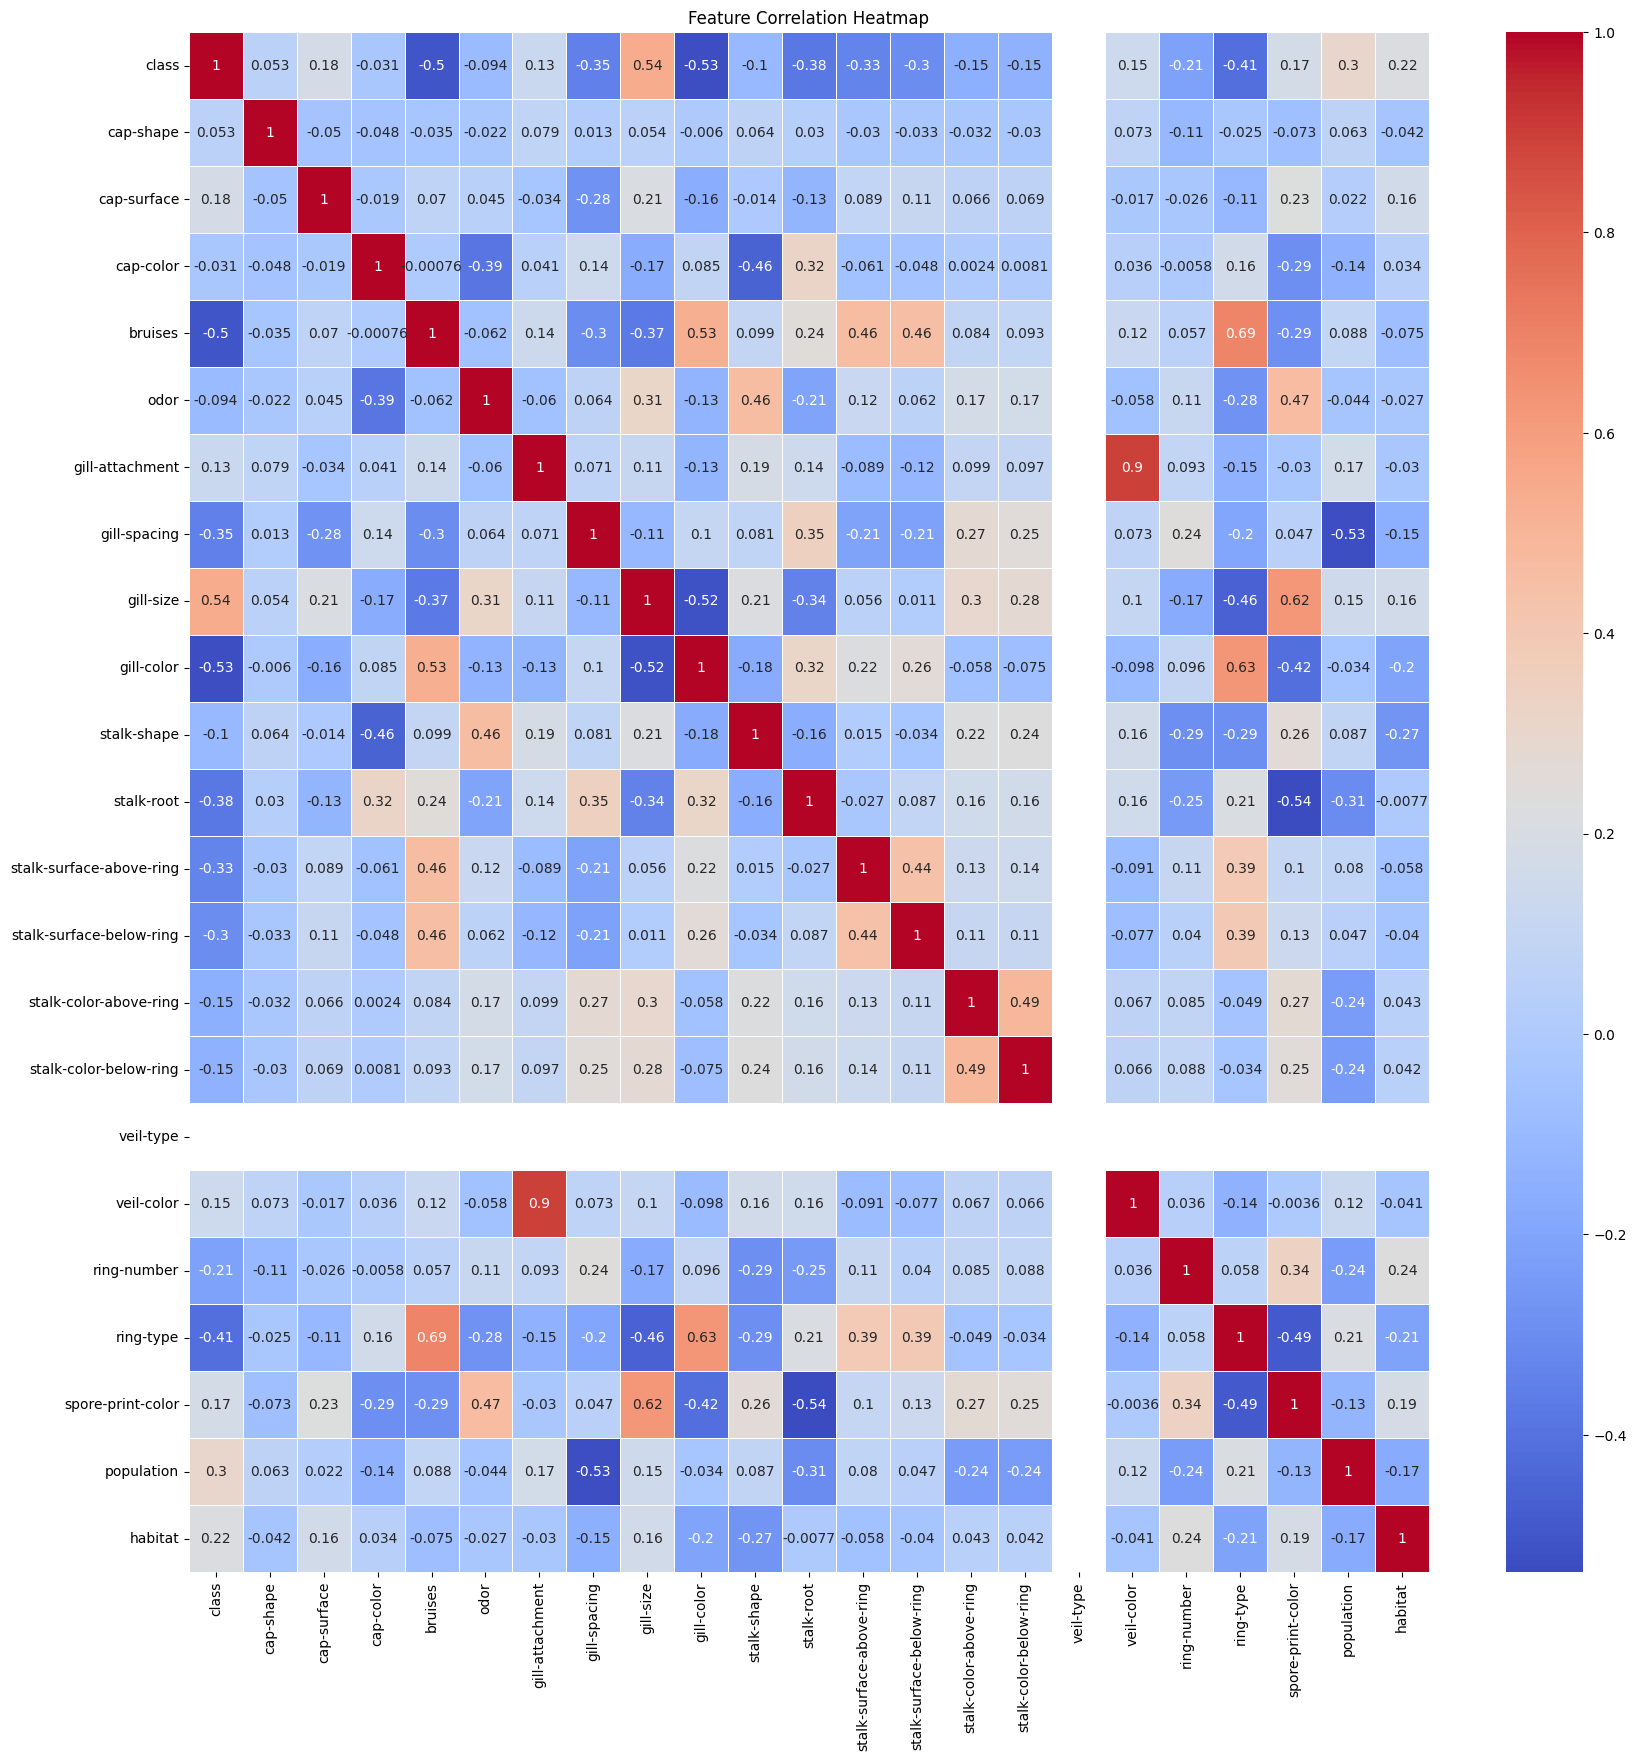

In [12]:
# Compute correlation matrix
corr_matrix = df.corr()

# Draw the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

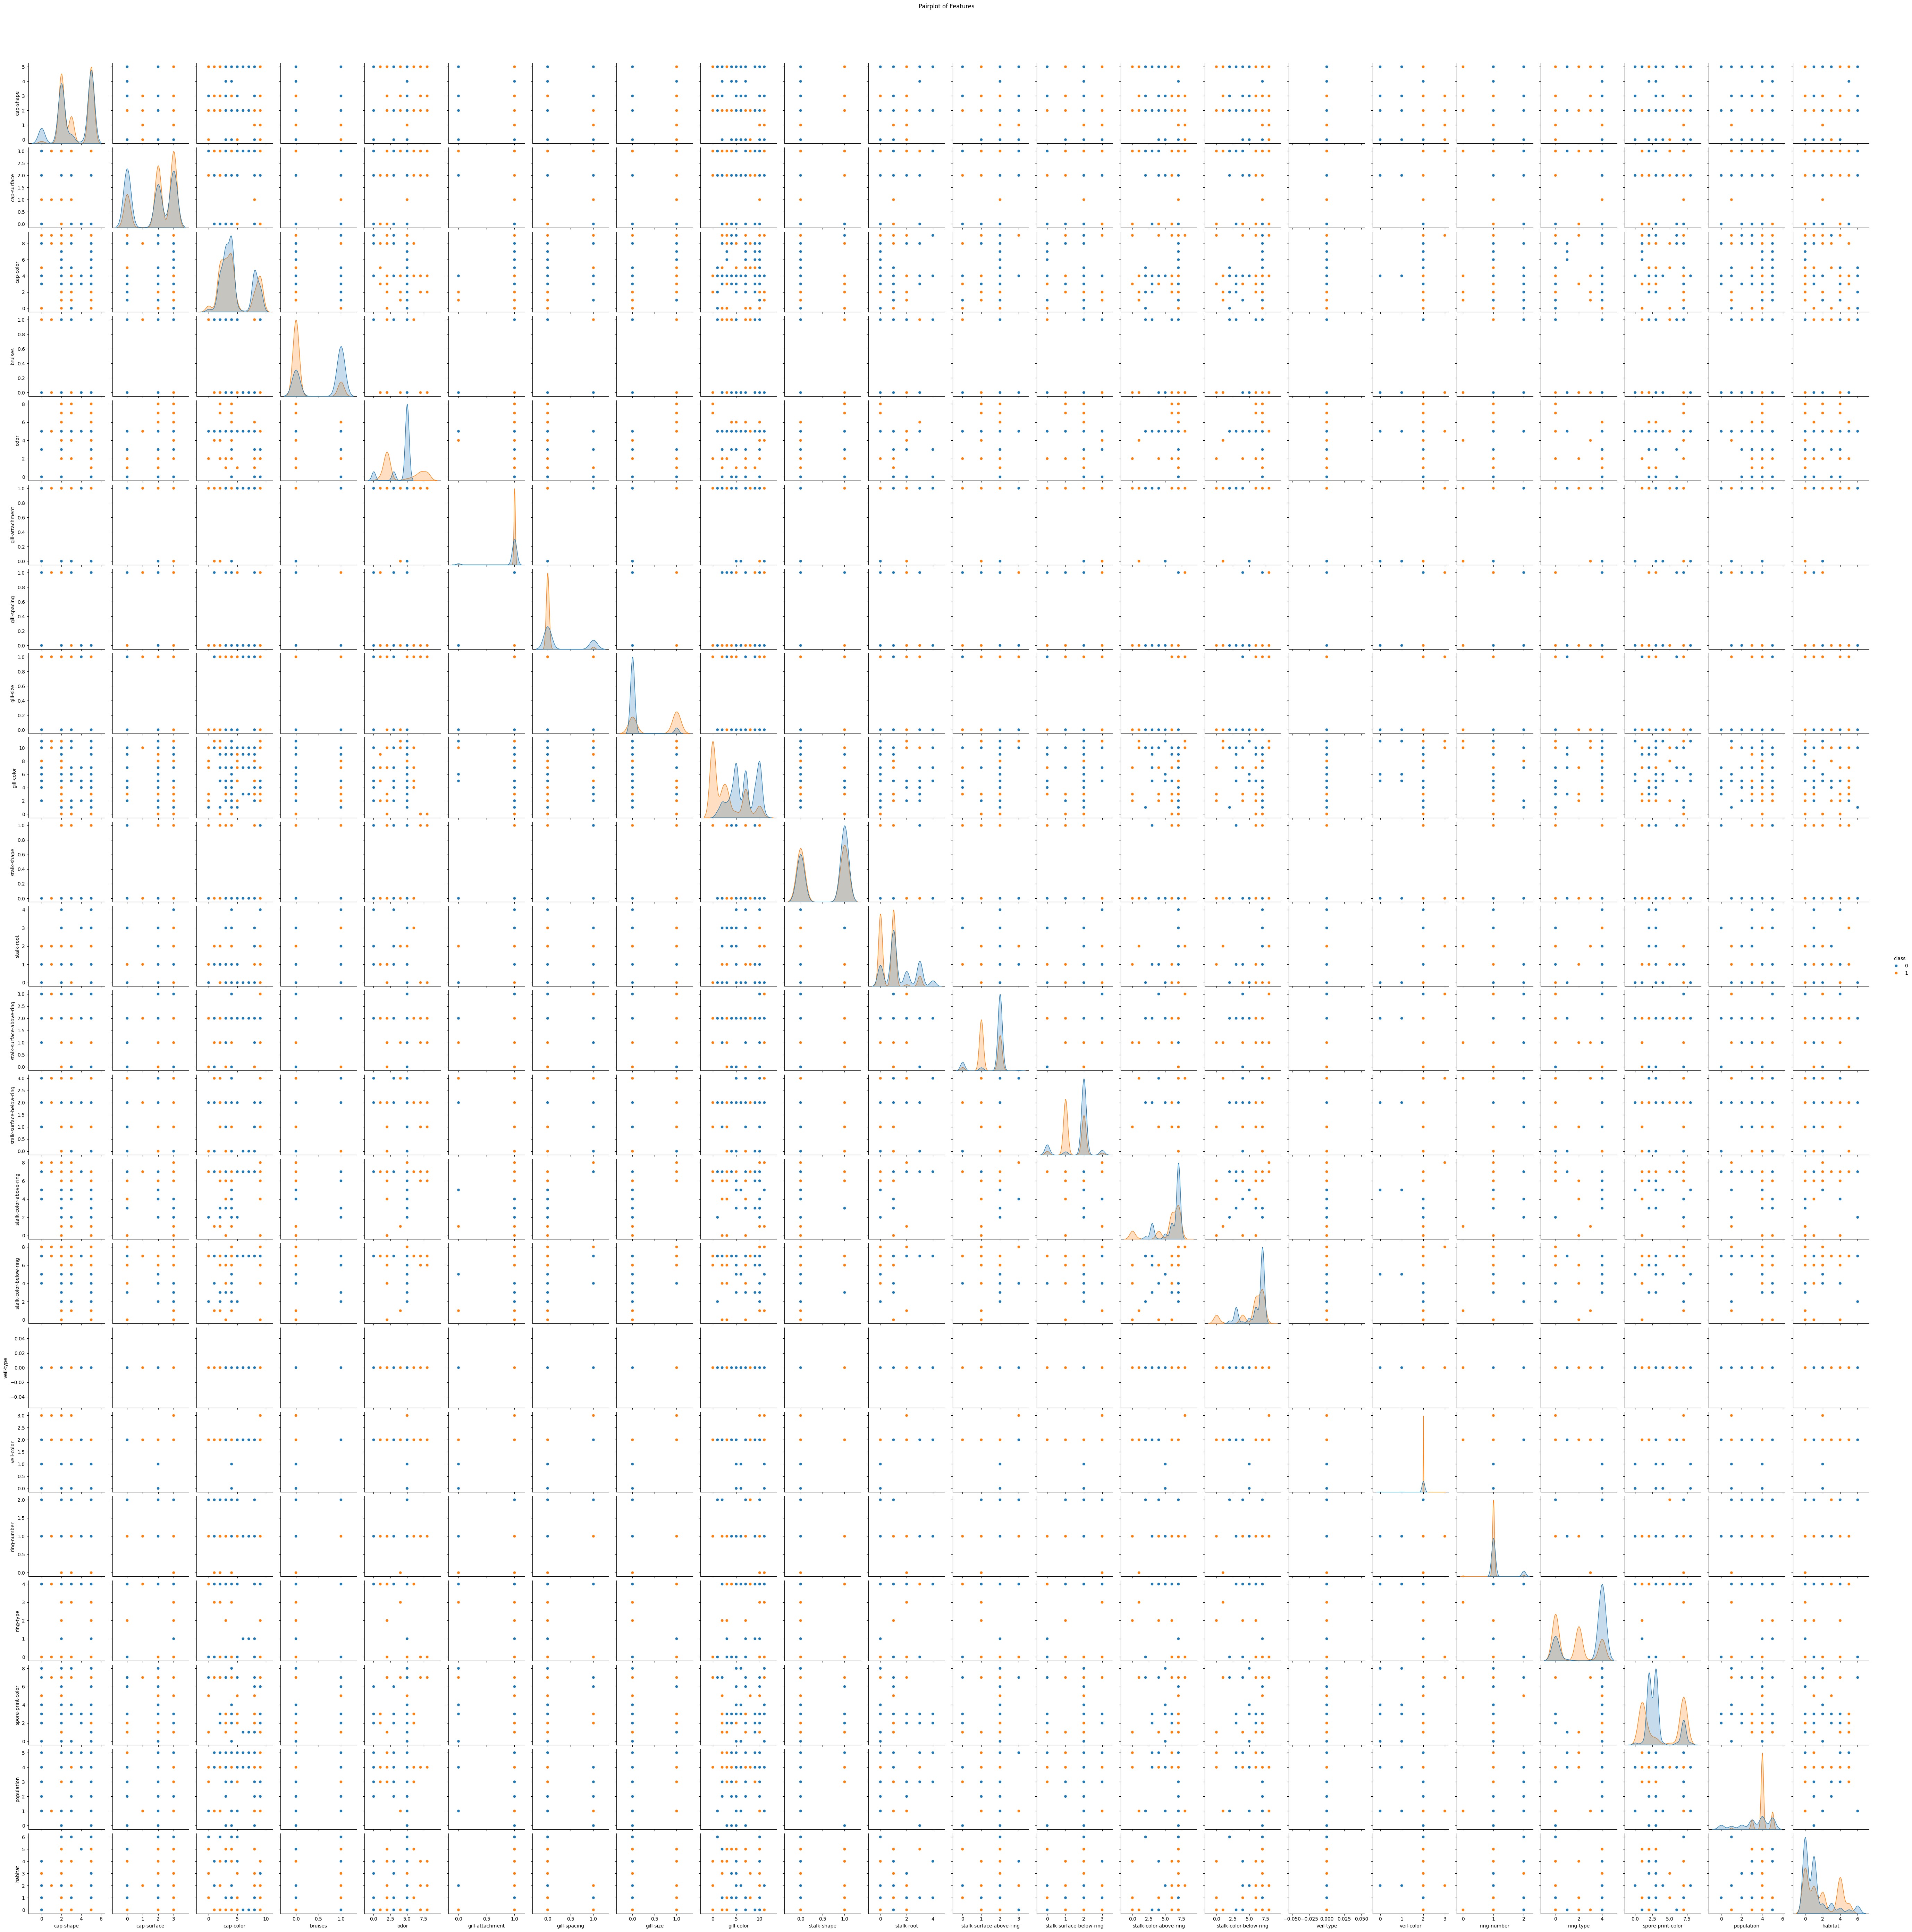

In [13]:
# Draw pairplot
sns.pairplot(df, hue='class')  # Omit 'hue' if no categorical label
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


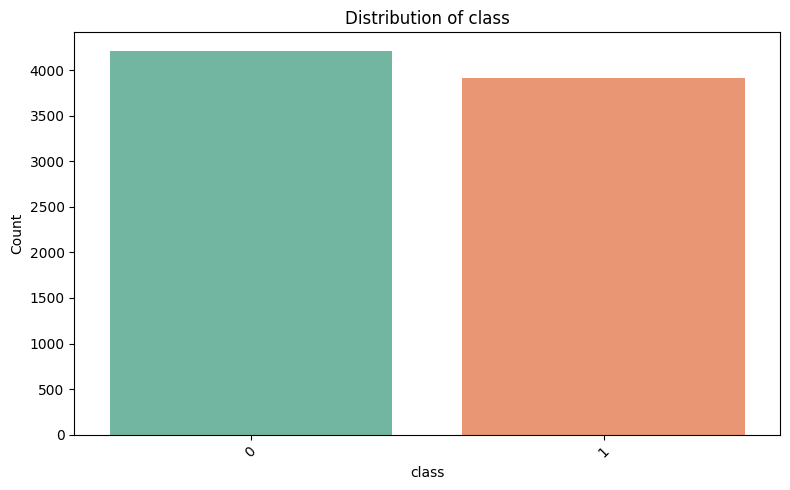

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


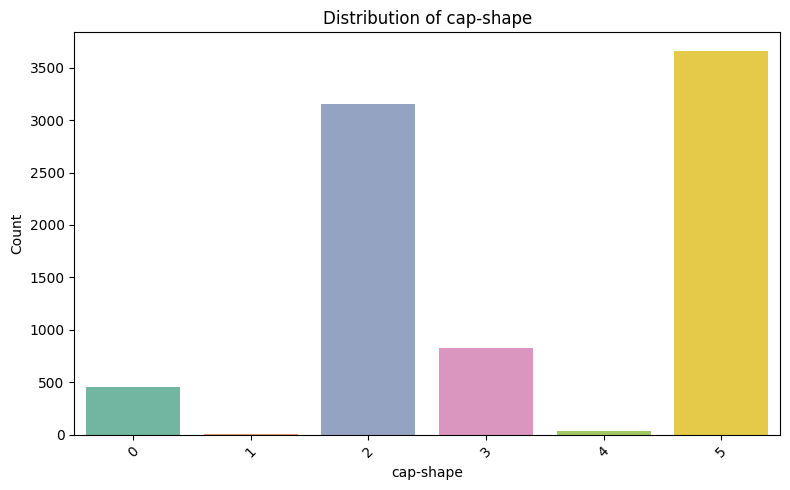

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


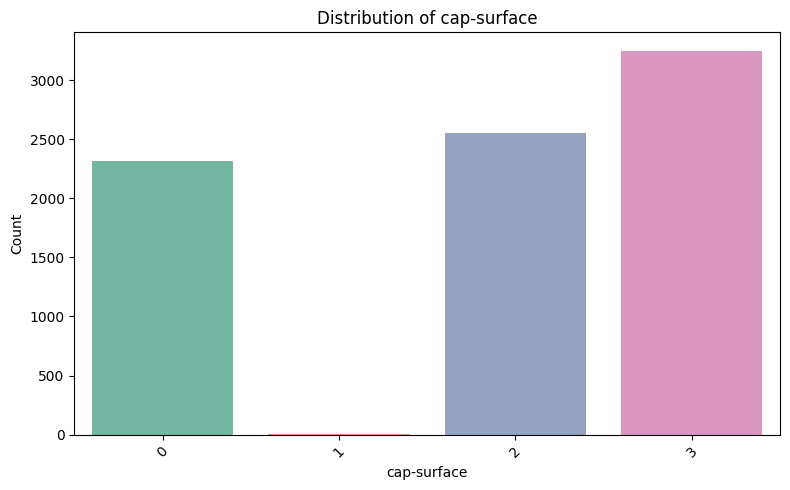

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


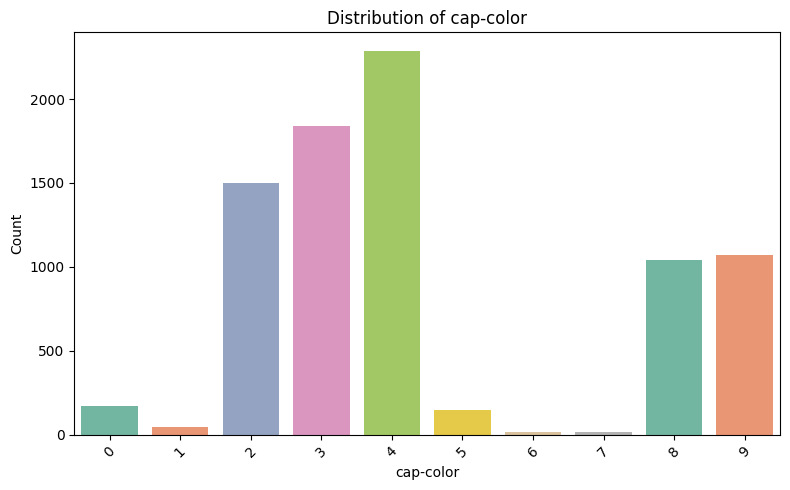

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


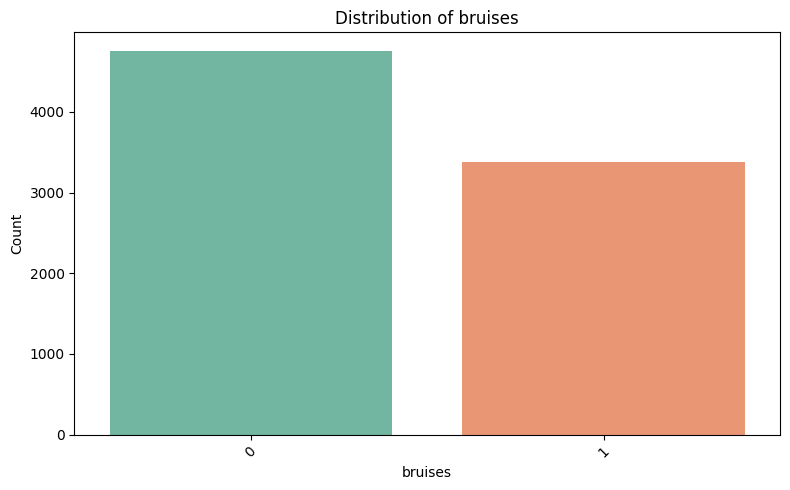

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


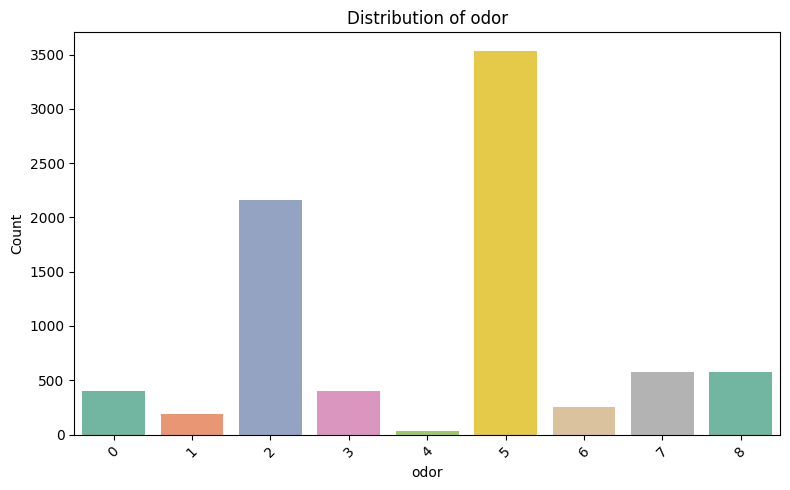

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


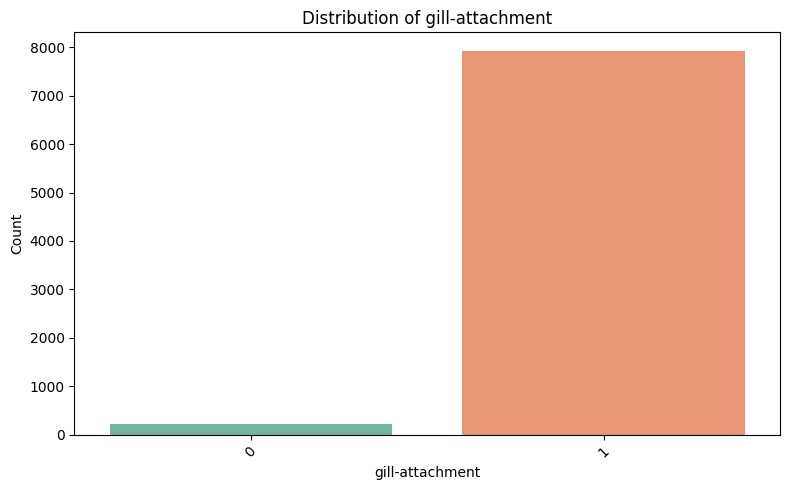

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


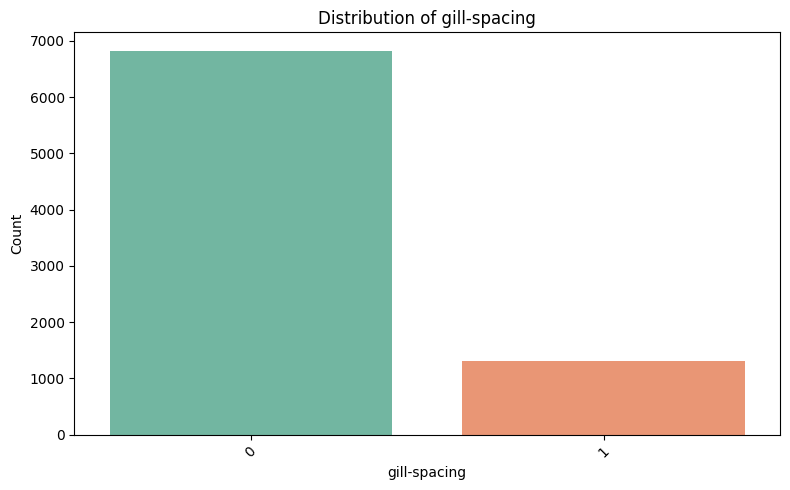

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


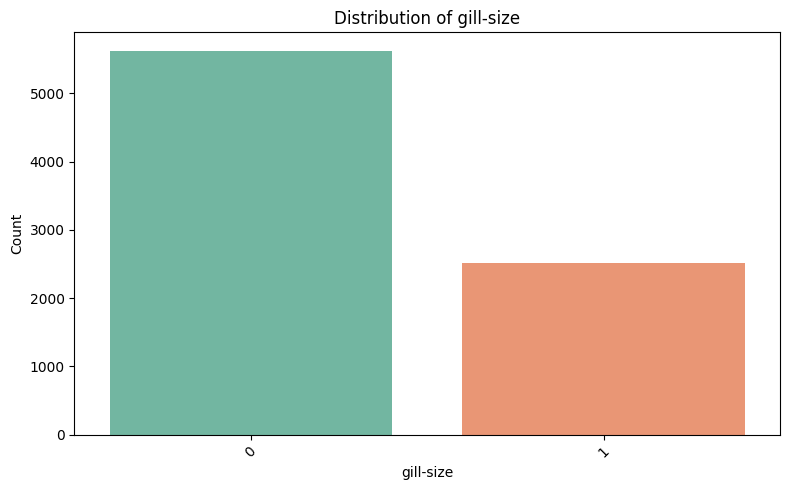

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


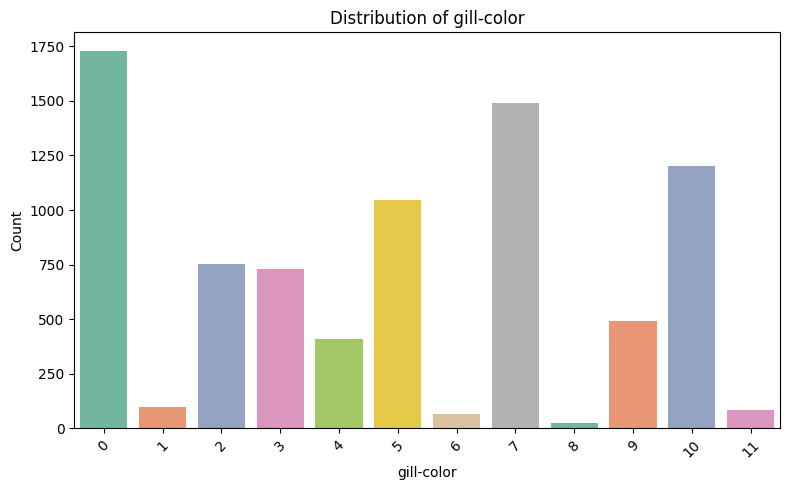

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


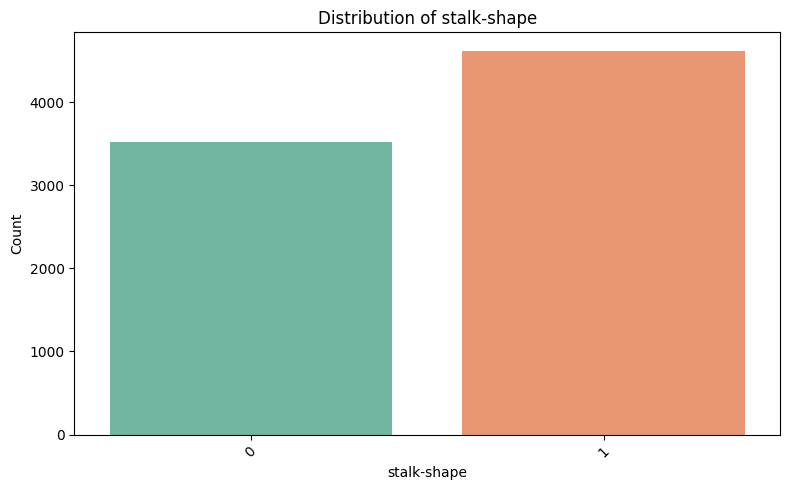

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


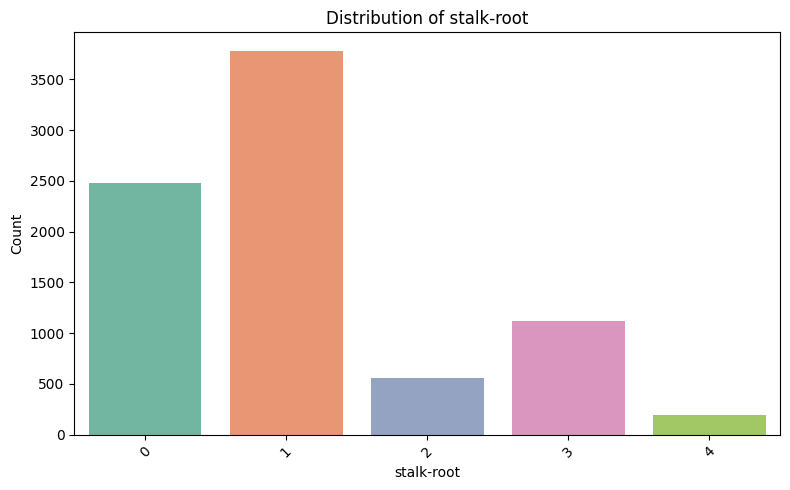

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


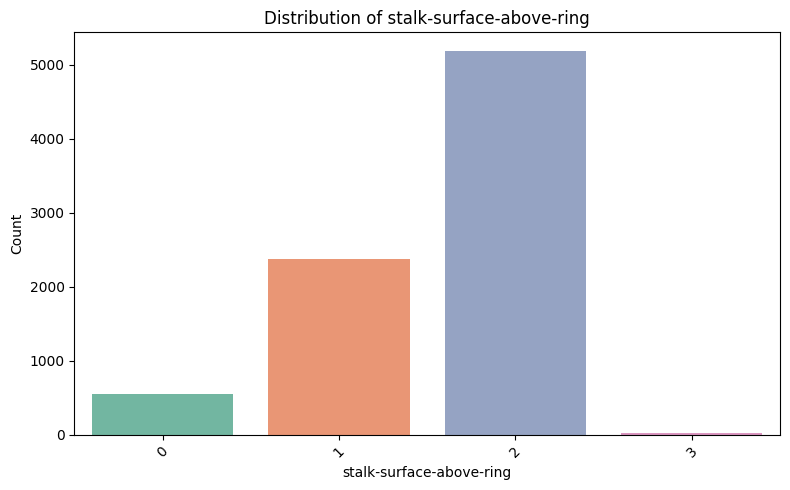

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


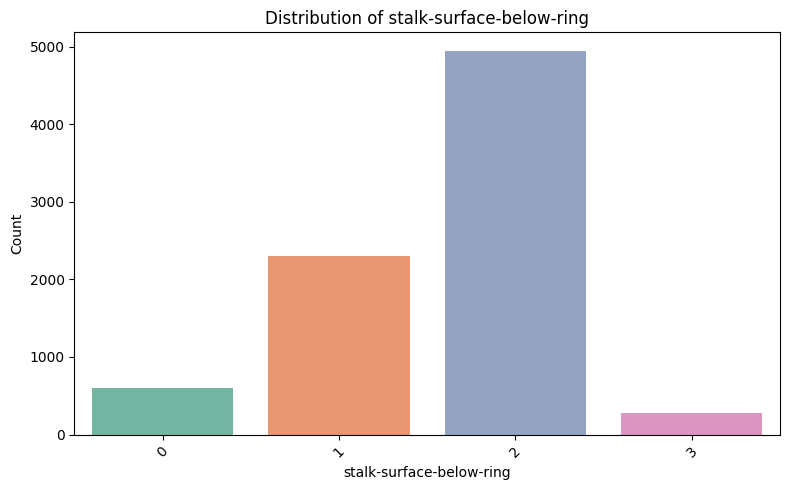

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


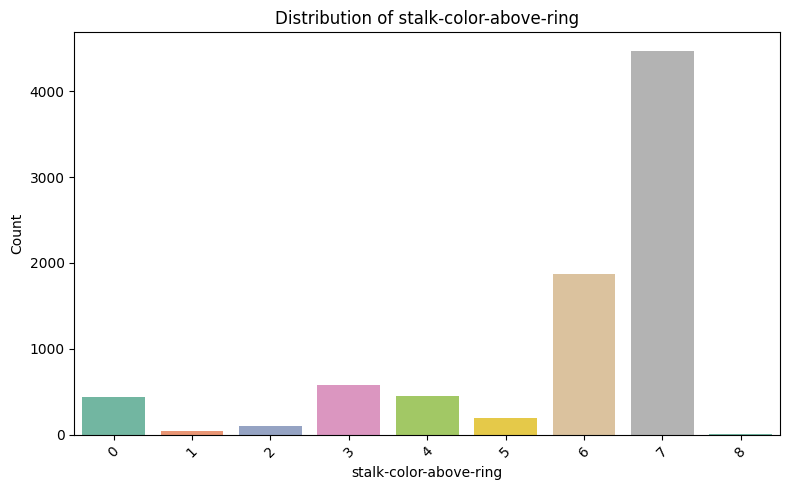

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


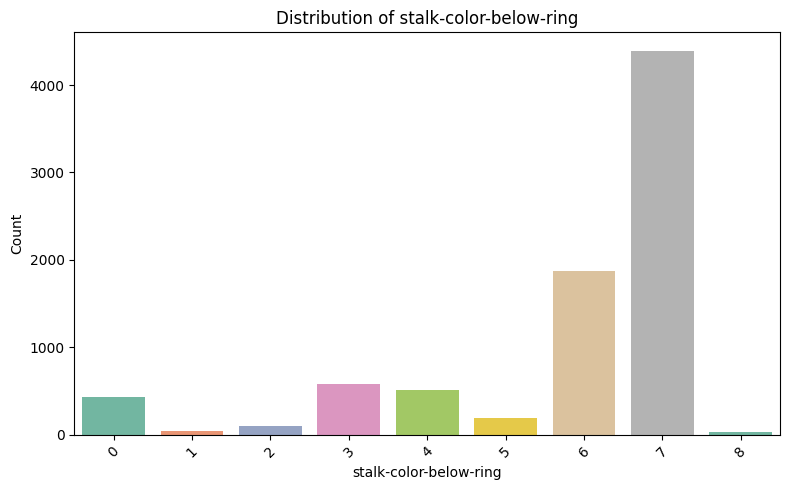

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


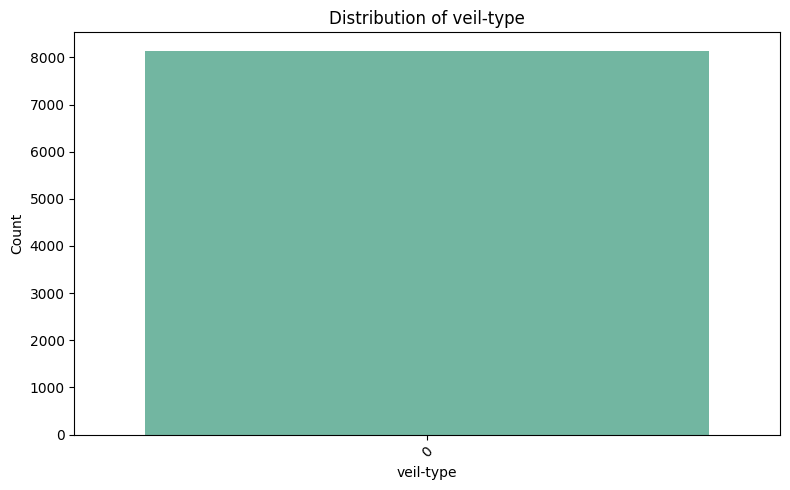

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


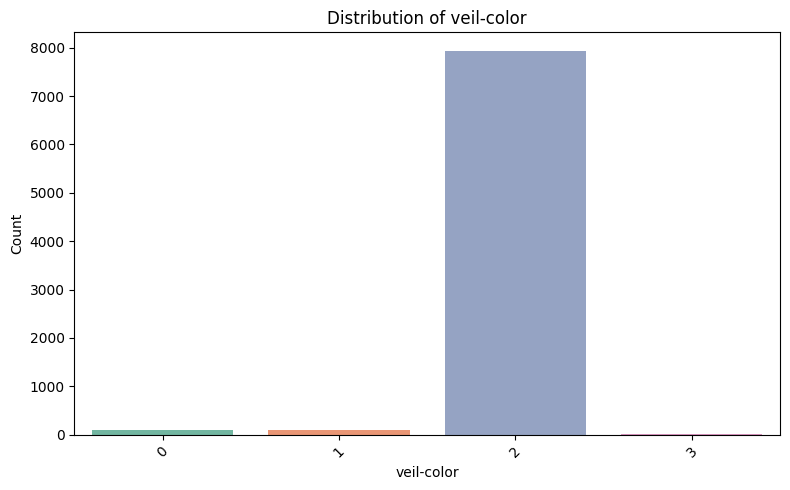

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


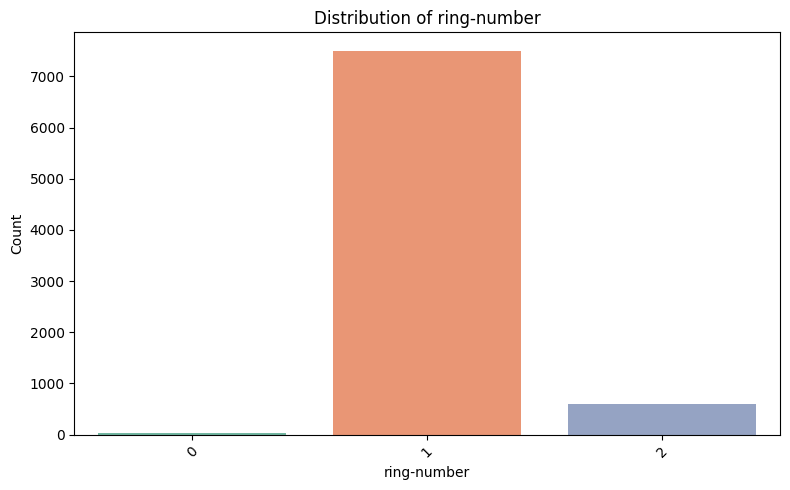

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


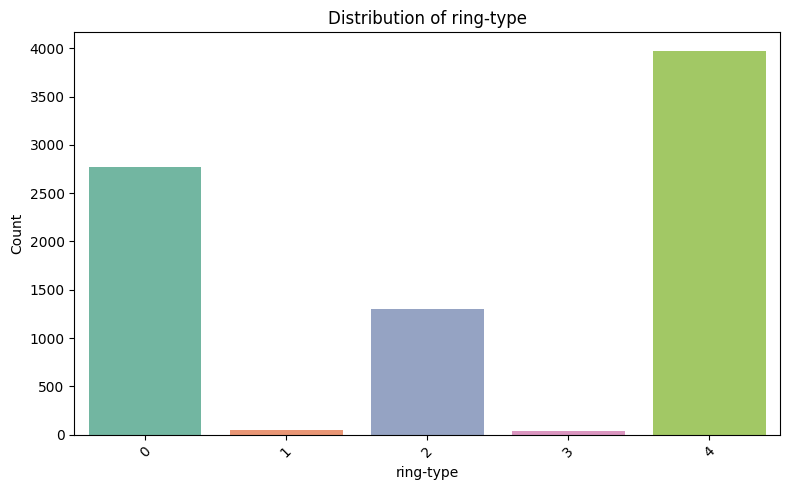

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


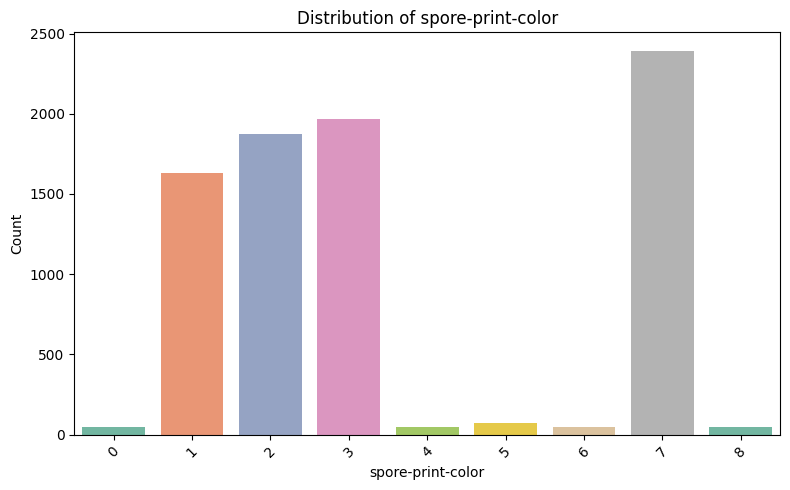

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


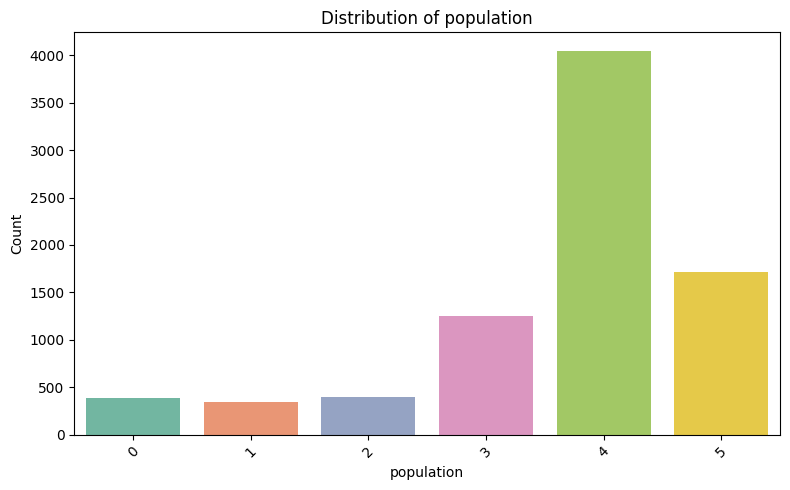

C:\Users\AKSHATHA R V\AppData\Local\Temp\ipykernel_21764\3164783971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


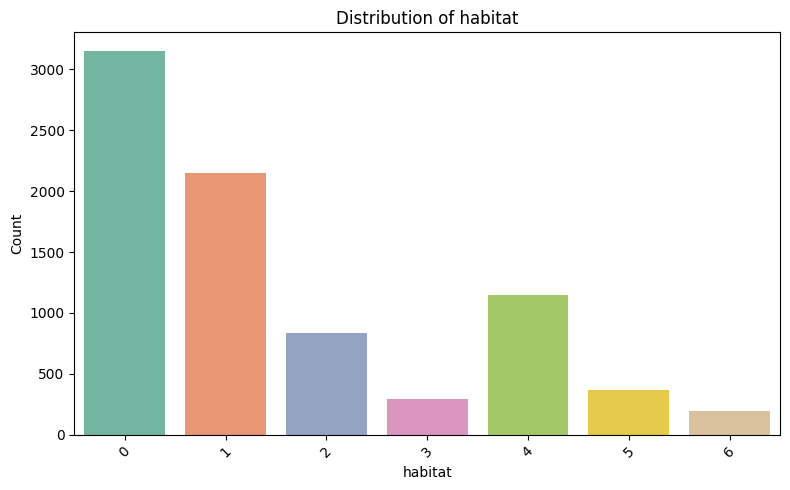

In [14]:
#Loop through each column and create a bar chart
for column in df.columns:
    # Check if the column is categorical or discrete (avoid plotting continuous numerical columns)
    if df[column].dtype == 'object' or len(df[column].unique()) < 20:  # You can adjust the threshold (20) for unique values
        plt.figure(figsize=(8, 5))
        sns.countplot(x=column, data=df, palette='Set2')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

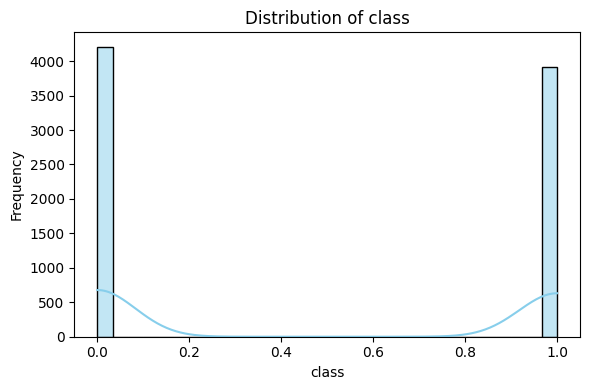

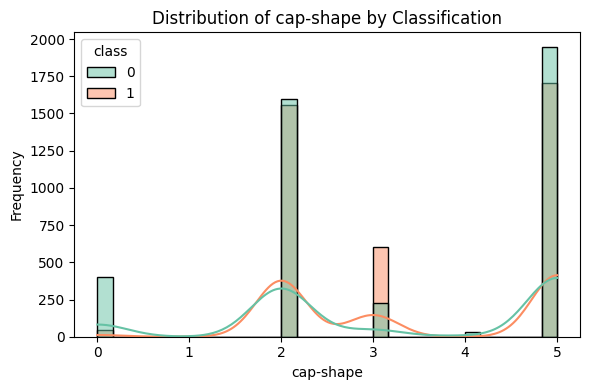

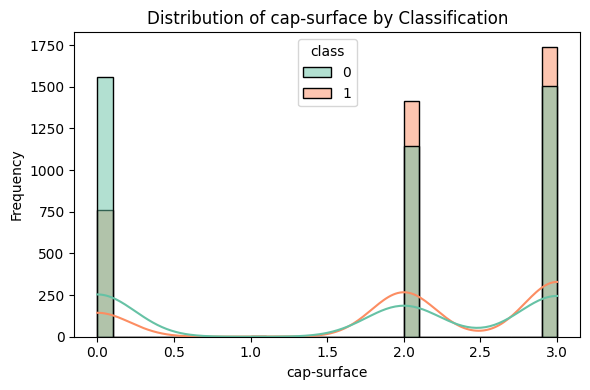

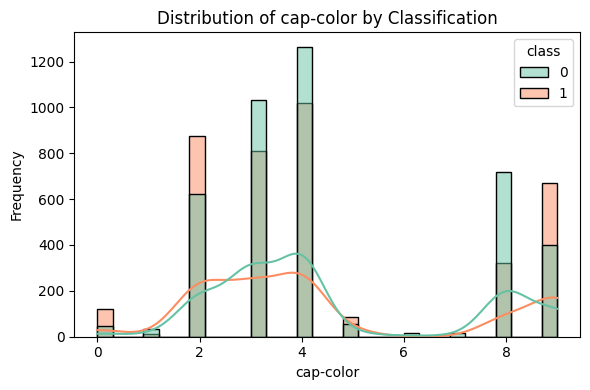

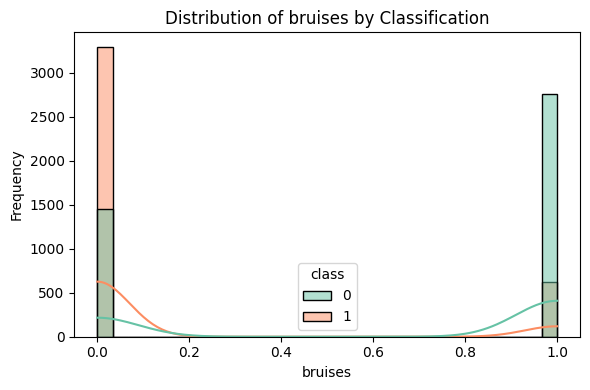

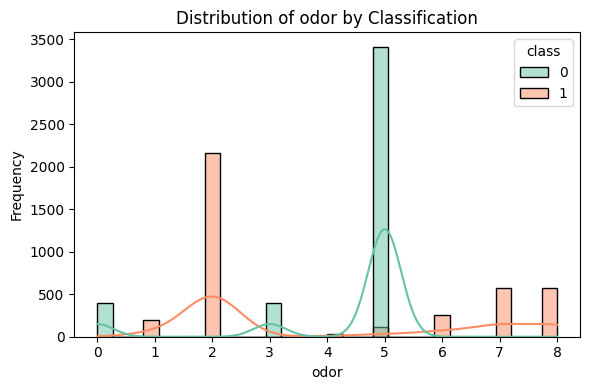

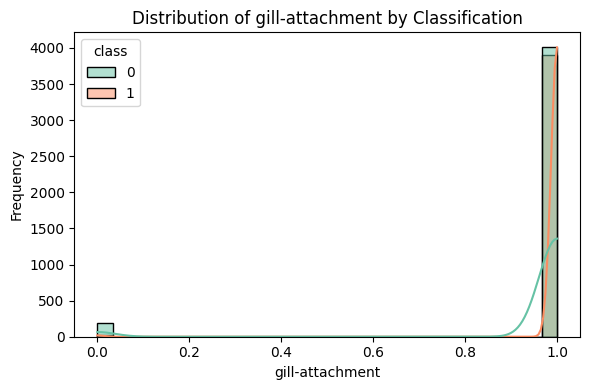

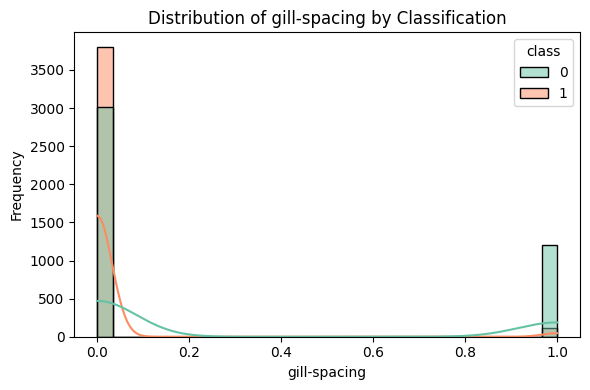

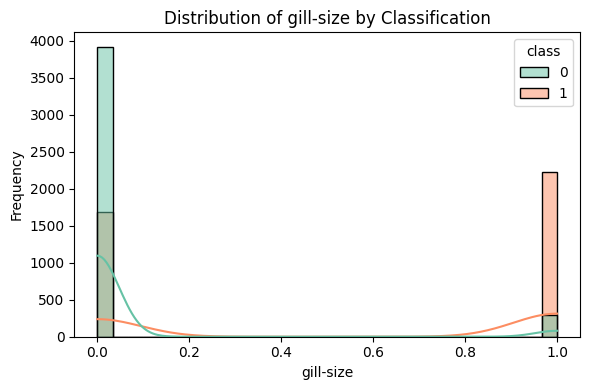

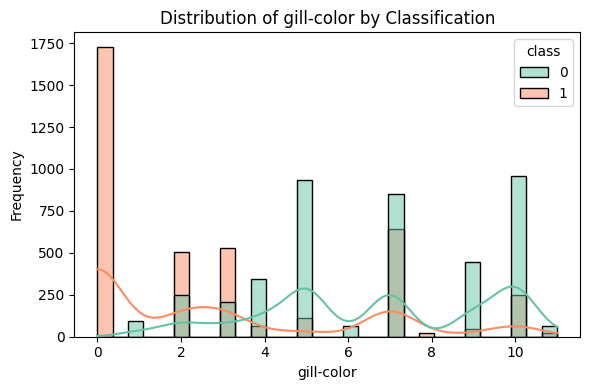

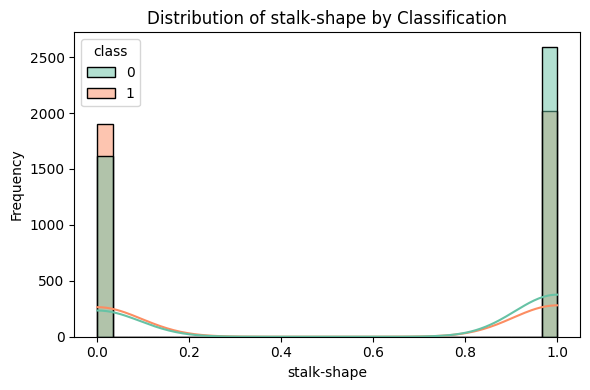

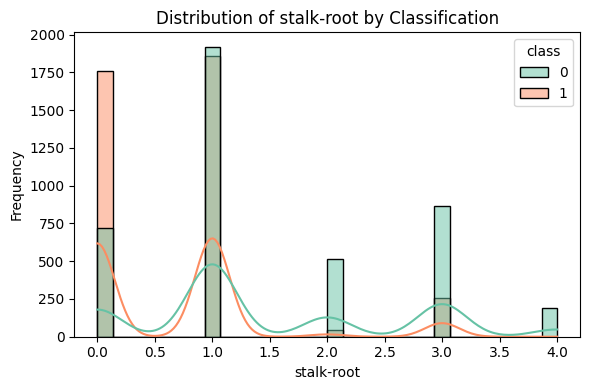

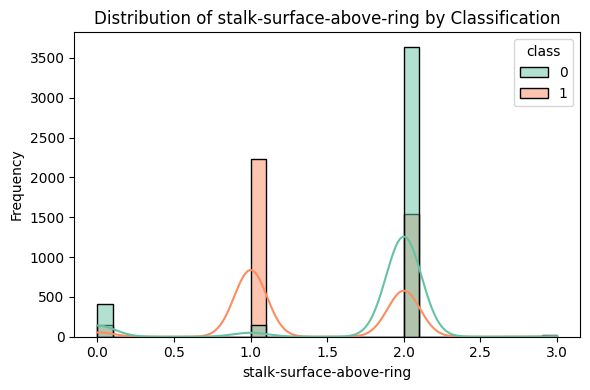

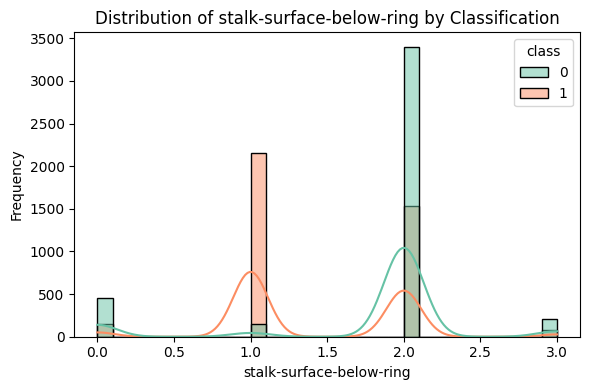

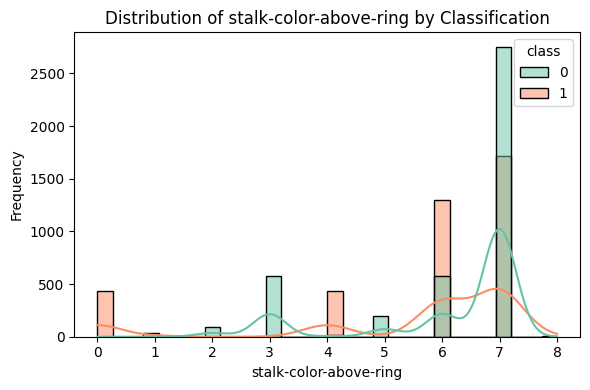

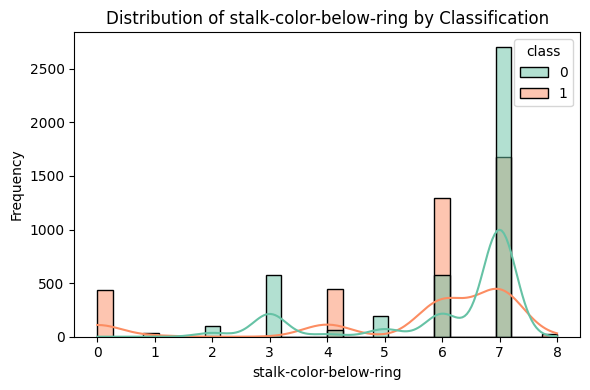

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

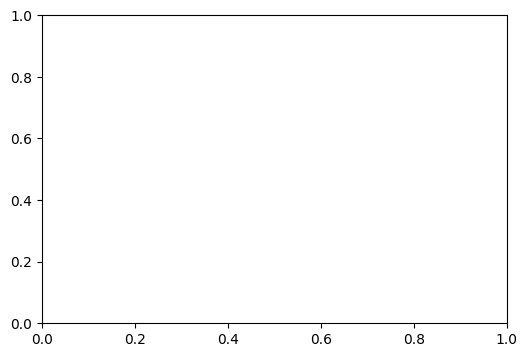

In [15]:
# Get all numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Plot distribution for each feature
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    if 'class' in df.columns and col != 'class':
        sns.histplot(data=df, x=col, hue='class', kde=True, bins=30, palette='Set2')
        plt.title(f'Distribution of {col} by Classification')
    else:
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [16]:
#Drop a specific column
df = df.drop(columns=['veil-type'])

In [17]:
#Last 5 records
df.tail()

class  cap-shape  cap-surface  cap-color  bruises  odor  \
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
8119                0             0          0          11  ...   
8120                0             0          0          11  ...   
8121                0             0          0           5  ...   
8122                1             0          1           0  ...   
8123                0             0          0          11  ...   

      stalk-surface-above-ring  stalk-surface-below-ring  \
8119                         2                         2   
8120                         2                         2   
8121                         2                         2   
8122                         2                         1   
8123                         2                         2   

      stalk-color-above-ring  stalk-color-below-ring  veil-color  ring-number  \
8119                       5                       5           1            1   
8120                       5                       5           0            1   
8121                       5                       5           1            1   
8122                       7                       7           2            1   
8123                       5                       5           1            1   

      ring-type  spore-print-color  population  habitat  
8119          4                  0           1        2  
8120          4                  0           4        2  
8121          4                  0           1        2  
8122          0                  7           4        2  
8123          4                  4           1        2  

[5 rows x 22 columns]

In [18]:
#Define the target variable (y) and feature variables (X)
y = df['class']       # Replace with your actual target column name
X = df.drop('class', axis=1)  # Drop the target column from features

In [19]:
# X = your features (DataFrame or NumPy array)
# y = your target (Series or array)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Now X_train and y_train are 50% of the data, X_test and y_test are the other 50%

In [20]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4062, 21)
X_test shape: (4062, 21)
y_train shape: (4062,)
y_test shape: (4062,)


In [21]:
#Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7993599212210734

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      2085
           1       0.92      0.65      0.76      1977

    accuracy                           0.80      4062
   macro avg       0.83      0.80      0.79      4062
weighted avg       0.82      0.80      0.79      4062



In [22]:
# Initialize the MultinomialNB model with partial_fit support
model = MultinomialNB()

# Get all class labels (needed for partial_fit)
classes = np.unique(y)

# Simulate batch training (let's use 2 batches for example)
batch_size = len(X_train) // 2
for i in range(0, len(X_train), batch_size):
    X_batch = X_train.iloc[i:i+batch_size]
    y_batch = y_train.iloc[i:i+batch_size]
    model.partial_fit(X_batch, y_batch, classes=classes if i == 0 else None)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7993599212210734

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83      2085
           1       0.92      0.65      0.76      1977

    accuracy                           0.80      4062
   macro avg       0.83      0.80      0.79      4062
weighted avg       0.82      0.80      0.79      4062



In [23]:
#Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.930576070901034

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2085
           1       0.93      0.93      0.93      1977

    accuracy                           0.93      4062
   macro avg       0.93      0.93      0.93      4062
weighted avg       0.93      0.93      0.93      4062



In [24]:
#SGD algorithm without applying standardization

#Without applying the standardization method

#Initialize and train the SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)  # 'log_loss' for logistic regression
sgd.fit(X_train, y_train)

# Make predictions
y_pred = sgd.predict(X_test)

#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9401772525849336

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      2085
           1       0.92      0.96      0.94      1977

    accuracy                           0.94      4062
   macro avg       0.94      0.94      0.94      4062
weighted avg       0.94      0.94      0.94      4062



In [25]:
#SGD algorithm after applying standardization

#With applying standard scalar

#Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

#Initialize and train the SGDClassifier
sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)  # 'log_loss' for logistic regression
sgd.fit(X_train_scaled, y_train)

#Make predictions
y_pred = sgd.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9645494830132939

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2085
           1       0.94      0.99      0.96      1977

    accuracy                           0.96      4062
   macro avg       0.97      0.97      0.96      4062
weighted avg       0.97      0.96      0.96      4062



In [26]:
# Initialize the KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of KNN model with k={k}: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of KNN model with k=3: 99.68%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2085
           1       0.99      1.00      1.00      1977

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True))
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5
)

# Train the stacking classifier
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stack_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Stacking Classifier Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



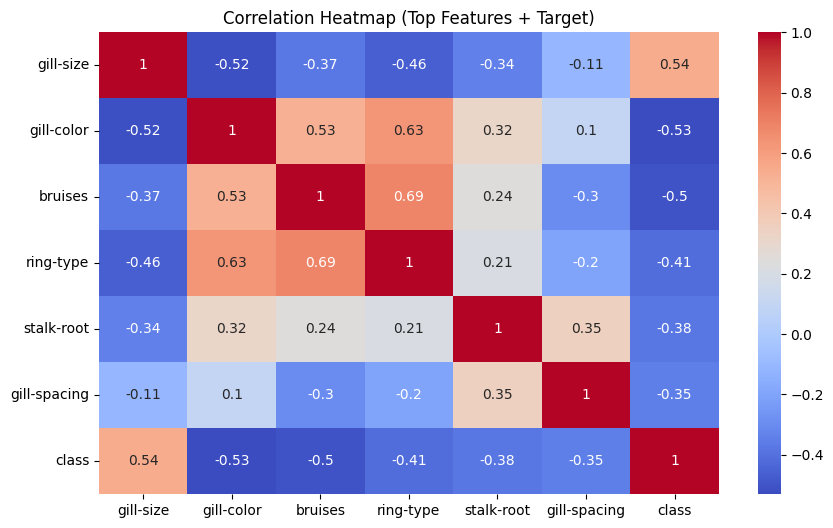

 Selected Features by Correlation-Based Filter Method (CFS):
['gill-size', 'gill-color', 'bruises', 'ring-type', 'stalk-root', 'gill-spacing']


In [29]:
#filter-CFS feature selection

# Ensure target column is named correctly
target_column = 'class'

# 1. Compute the correlation matrix
corr_matrix = df.corr()

# 2. Get correlation of all features with the target
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)

# 3. Select top features (excluding the target itself)
top_features = target_corr[1:7].index.tolist()  # pick top 6 features
X_cfs = df[top_features]
y = df[target_column]

# 4. Visualize (Optional)
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_features + [target_column]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top Features + Target)")
plt.show()

# 5. Output
print(" Selected Features by Correlation-Based Filter Method (CFS):")
print(top_features)

Multinomial Naive Bayes - Mean Accuracy: 0.7618, Std Dev: 0.1838
Gaussian Naive Bayes - Mean Accuracy: 0.8641, Std Dev: 0.1105
SGD Classifier - Mean Accuracy: 0.8410, Std Dev: 0.1377
K-Nearest Neighbors - Mean Accuracy: 0.9177, Std Dev: 0.1070
Stacking Classifier - Mean Accuracy: 0.8865, Std Dev: 0.1269


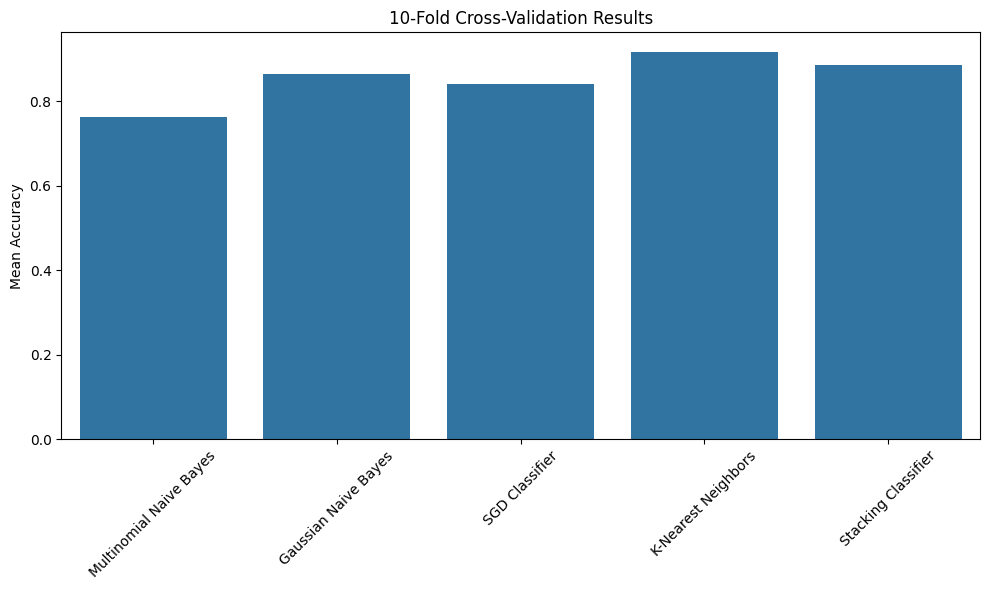

In [30]:
# model development and evaluation on CFS selected features

# Ensure target column is named correctly
target_column = 'class'

# Compute the correlation matrix
corr_matrix = df.corr()

# Get correlation of all features with the target
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)

# Select top features (excluding the target itself)
top_features = target_corr[1:7].index.tolist()  # pick top 6 features
X_cfs = df[top_features]
y = df[target_column]

# Define models with preprocessing where necessary
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "SGD Classifier": make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3)),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
            ('lr', LogisticRegression(max_iter=1000))
        ],
        final_estimator=LogisticRegression(max_iter=1000)
    )
}


# Model Evaluation on selected feature

# Evaluate using 10-fold cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_cfs, y, cv=10, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[np.mean(scores) for scores in results.values()])
plt.ylabel("Mean Accuracy")
plt.title("10-Fold Cross-Validation Results")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Selected Features by Wrapper Method (Forward Selection):
['cap-shape', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape', 'stalk-surface-above-ring']
Multinomial Naive Bayes - Mean Accuracy: 0.7786, Std Dev: 0.1874
Gaussian Naive Bayes - Mean Accuracy: 0.6401, Std Dev: 0.1703
SGD Classifier - Mean Accuracy: 0.9380, Std Dev: 0.0541
KNN - Mean Accuracy: 0.9296, Std Dev: 0.1026
Stacking Classifier - Mean Accuracy: 0.9367, Std Dev: 0.0558


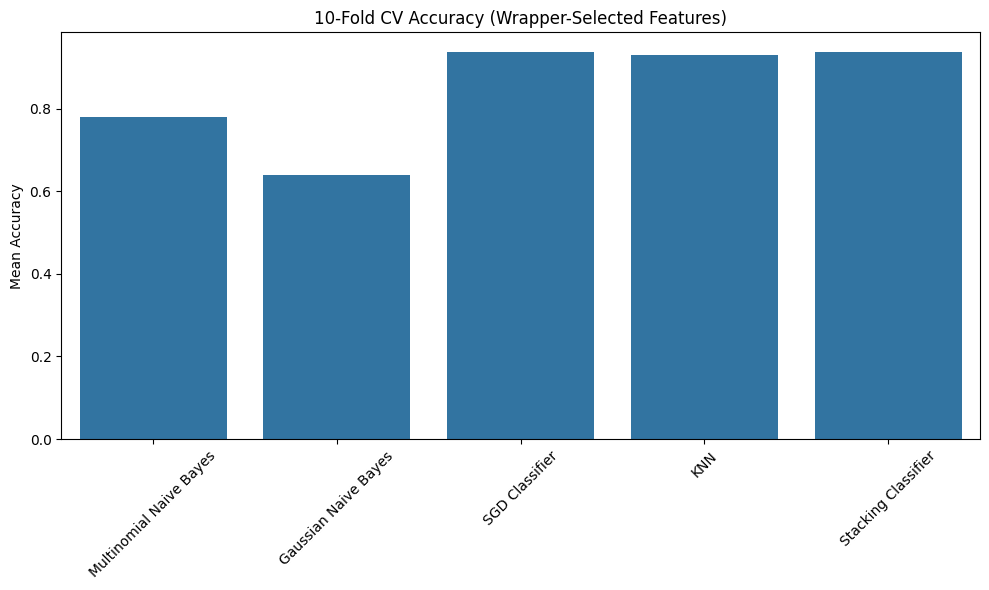

In [31]:
# Wrapper method for feature selection 

# Define target
target_column = 'class'
X = df.drop(columns=[target_column])
y = df[target_column]

# Apply wrapper method (Forward Selection)
wrapper_model = LogisticRegression(max_iter=1000)
sfs = SequentialFeatureSelector(wrapper_model, n_features_to_select=6, direction='forward')
sfs.fit(X, y)

# Get selected features
selected_wrapper_features = X.columns[sfs.get_support()].tolist()
X_wrapper = X[selected_wrapper_features]

print("Selected Features by Wrapper Method (Forward Selection):")
print(selected_wrapper_features)

# Model development on selected feature

# Define models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "SGD Classifier": make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3)),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
            ('lr', LogisticRegression(max_iter=1000))
        ],
        final_estimator=LogisticRegression(max_iter=1000)
    )
}

# Model Evaluation on selected feature

# Evaluate using 10-fold cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_wrapper, y, cv=10, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[np.mean(scores) for scores in results.values()])
plt.ylabel("Mean Accuracy")
plt.title("10-Fold CV Accuracy (Wrapper-Selected Features)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Selected Features by Embedded Method (LASSO):
['cap-surface', 'bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'spore-print-color', 'habitat']
Multinomial Naive Bayes - Mean Accuracy: 0.7304, Std Dev: 0.1505
Gaussian Naive Bayes - Mean Accuracy: 0.8492, Std Dev: 0.1335
SGD Classifier - Mean Accuracy: 0.8916, Std Dev: 0.1268
KNN - Mean Accuracy: 0.9495, Std Dev: 0.1047
Stacking Classifier - Mean Accuracy: 0.9322, Std Dev: 0.1361


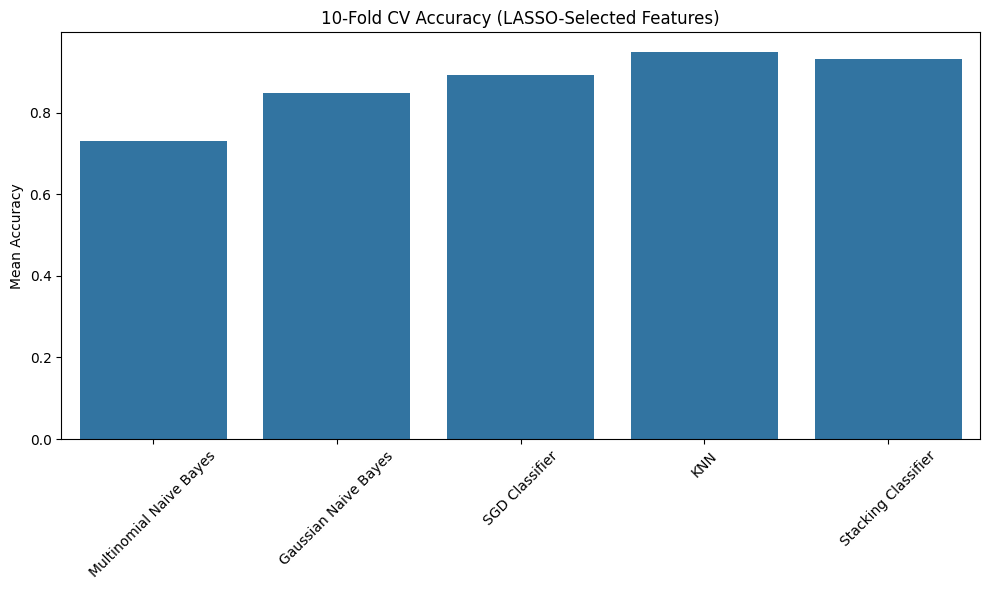

In [32]:
#Embedded method feature selection

# Define target
target_column = 'class'
X = df.drop(columns=[target_column])
y = df[target_column]

# Standardize features (required for LASSO)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO with cross-validation
lasso = LassoCV(cv=10, random_state=42)
lasso.fit(X_scaled, y)

# Get selected features (non-zero coefficients)
coef = pd.Series(lasso.coef_, index=X.columns)
selected_lasso_features = coef[coef != 0].index.tolist()
X_lasso = X[selected_lasso_features]

print("Selected Features by Embedded Method (LASSO):")
print(selected_lasso_features)

#Model development

# Define models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "SGD Classifier": make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3)),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
            ('lr', LogisticRegression(max_iter=1000))
        ],
        final_estimator=LogisticRegression(max_iter=1000)
    )
}

# Evaluate models with 10-fold CV
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_lasso, y, cv=10, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

# Visualize performance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[np.mean(scores) for scores in results.values()])
plt.ylabel("Mean Accuracy")
plt.title("10-Fold CV Accuracy (LASSO-Selected Features)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Multinomial Naive Bayes - Mean Accuracy: 0.7576, Std Dev: 0.1466
Gaussian Naive Bayes - Mean Accuracy: 0.8464, Std Dev: 0.1098
SGD Classifier - Mean Accuracy: 0.9025, Std Dev: 0.1244
KNN - Mean Accuracy: 0.9502, Std Dev: 0.1026
Stacking Classifier - Mean Accuracy: 0.9328, Std Dev: 0.1347


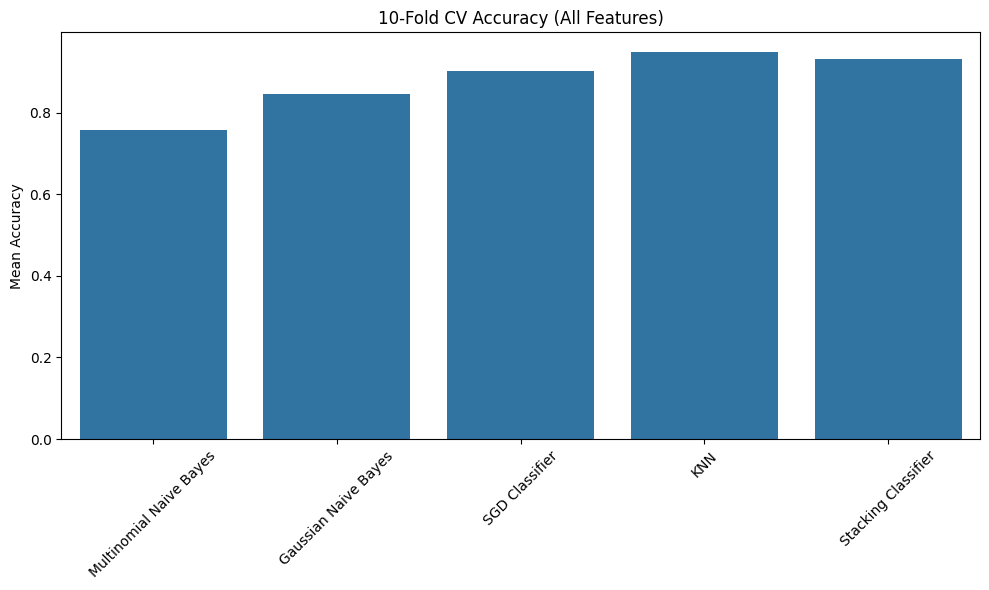

In [33]:
# Define features and target
target_column = 'class'
X = df.drop(columns=[target_column])
y = df[target_column]

# Define models
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Gaussian Naive Bayes": GaussianNB(),
    "SGD Classifier": make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3)),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Stacking Classifier": StackingClassifier(
        estimators=[
            ('svc', make_pipeline(StandardScaler(), SVC(probability=True))),
            ('lr', LogisticRegression(max_iter=1000))
        ],
        final_estimator=LogisticRegression(max_iter=1000)
    )
}

# Evaluate models using 10-fold cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=[np.mean(scores) for scores in results.values()])
plt.ylabel("Mean Accuracy")
plt.title("10-Fold CV Accuracy (All Features)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#Applying 10-fold cross validation method

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [35]:
#Logistic regression

#Preprocess the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=200)

#Perform 10-fold cross-validation and calculate accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(log_reg_classifier, X_scaled, y, cv=kf, scoring='accuracy')

#Output the results
print("Cross-validation scores: ", cv_scores)
print("Mean Accuracy: ", np.mean(cv_scores))

Cross-validation scores:  [0.95448954 0.95325953 0.96063961 0.96678967 0.9679803  0.95073892
 0.95689655 0.94458128 0.95935961 0.9544335 ]
Mean Accuracy:  0.9569168499566771


In [36]:
#Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Apply 10-fold Cross-Validation
cv_scores = cross_val_score(dt_model, X, y, cv=10, scoring='accuracy')

# Output the scores
print("Decision Tree - 10-Fold Cross-Validation Accuracy Scores:")
print(cv_scores)

# Output average and standard deviation
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Decision Tree - 10-Fold Cross-Validation Accuracy Scores:
[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.92610837 1.        ]

Mean Accuracy: 0.9611
Standard Deviation: 0.0946


In [37]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Perform 10-Fold Cross-Validation
rf_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

# Output the scores
print("Random Forest - 10-Fold Cross-Validation Accuracy Scores:")
print(rf_scores)

# Mean and Standard Deviation
print(f"\nMean Accuracy: {rf_scores.mean():.4f}")
print(f"Standard Deviation: {rf_scores.std():.4f}")

Random Forest - 10-Fold Cross-Validation Accuracy Scores:
[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.97167488 1.        ]

Mean Accuracy: 0.9657
Standard Deviation: 0.0939
